## STAT3612: Statistical Machine Learning
### Assignment 2: Classification
### DUE: Nov 10, 2024, Sunday, 11:59 PM

In [ ]:
! pip install numpy pandas matplotlib scikit-learn keras

In [ ]:
# Q7 (a)

# ------------------
import numpy as np
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

mnist = datasets.fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target

X = X / 255.0  # Normalize the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LDA(n_components=9)  # 9 components used because MNIST has 10 classes
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_lda, y_train)

y_pred = classifier.predict(X_test_lda)
accuracy = accuracy_score(y_test, y_pred)

print(f"Testing data accuracy: {accuracy * 100:.2f}%")
# ------------------

Testing data accuracy: 88.36%


In [ ]:
# Q7 (b)

# ------------------
import numpy as np
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

mask = (y == '0') | (y == '1')
X, y = X[mask], y[mask]

X = X / 255.0  # Normalize the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LDA(n_components=1)  # 1 component used for binary classification (2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_lda, y_train)

y_pred = classifier.predict(X_test_lda)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='1')
recall = recall_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred, pos_label='1')

print(f"Testing data accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
# ------------------

Testing data accuracy: 99.59%
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [1]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('X_train shape:', x_train.shape)
print('X_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


Consider flatten the images to 1D vectors and make the shape of the X be (Batch, dim).

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid t

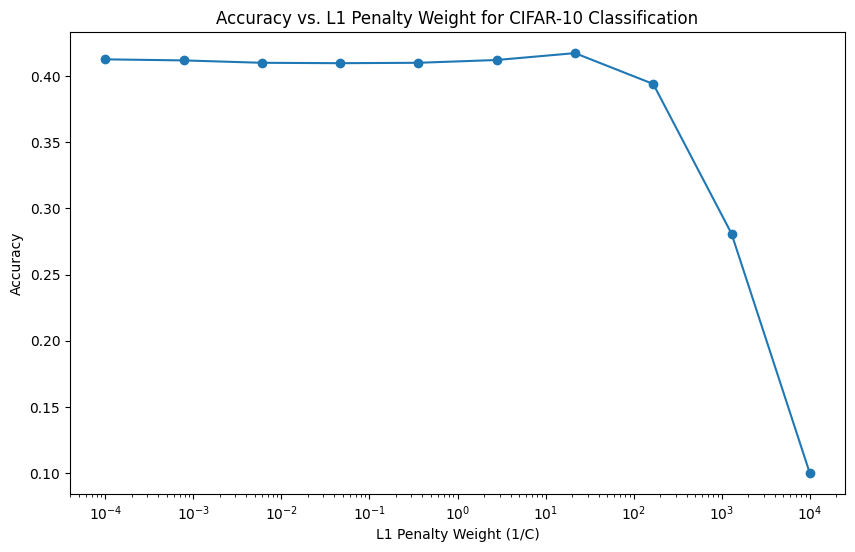

In [3]:
# Q8 (a)

# ------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten the images
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Standardize the pixel values for better performance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Reshape labels for compatibility
y_train = y_train.flatten()
y_test = y_test.flatten()

# Define L1 penalty weights to test (inverse of C)
C_values = np.logspace(-4, 4, 10)
accuracy_scores = []

# Train model with different penalty weights
for C in C_values:
    model = LogisticRegression(penalty='l1', solver='saga', C=C, multi_class='multinomial', max_iter=10)
    model.fit(x_train, y_train)

    # Predict on test set
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot accuracy vs. weight (1/C)
plt.figure(figsize=(10, 6))
plt.plot(1 / C_values, accuracy_scores, marker='o')
plt.xscale('log')
plt.xlabel('L1 Penalty Weight (1/C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. L1 Penalty Weight for CIFAR-10 Classification')
plt.show()
# ------------------

Epoch [1/10], Loss: 2.0103
Epoch [2/10], Loss: 1.9595
Epoch [3/10], Loss: 1.9538
Epoch [4/10], Loss: 1.9523
Epoch [5/10], Loss: 1.9518
Epoch [6/10], Loss: 1.9516
Epoch [7/10], Loss: 1.9516
Epoch [8/10], Loss: 1.9515
Epoch [9/10], Loss: 1.9515
Epoch [10/10], Loss: 1.9515
Class with highest accuracy: 1 (0.8920)


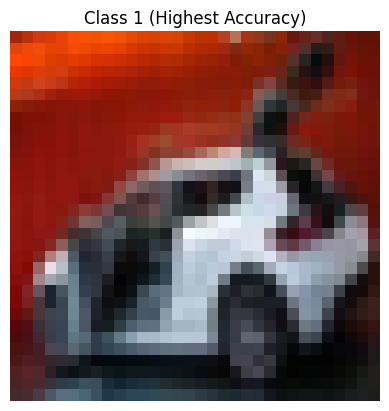

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes = 10
num_features = 32 * 32 * 3  # CIFAR-10 images are 32x32x3

# Preprocess data: Flatten and normalize images
x_train = x_train.reshape(-1, num_features) / 255.0
x_test = x_test.reshape(-1, num_features) / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

# Hyperparameters
learning_rate = 0.001
lambda_reg = 0.01
num_epochs = 10

# Initialize weights
W = np.random.randn(num_classes, num_features) * 0.01

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

def compute_loss_and_gradient(x, y, W, lambda_reg):
    scores = W @ x
    probs = softmax(scores)
    loss = -np.log(probs[y]) + (lambda_reg / 2) * np.sum(W ** 2)
    y_one_hot = np.zeros(num_classes)
    y_one_hot[y] = 1
    grad = np.outer((probs - y_one_hot), x) + lambda_reg * W
    return loss, grad

# Training loop
for epoch in range(num_epochs):
    total_loss = 0
    for i in range(len(x_train)):
        img = x_train[i]
        label = y_train[i]
        loss, grad = compute_loss_and_gradient(img, label, W, lambda_reg)
        W -= learning_rate * grad  # Update weights
        total_loss += loss

    avg_loss = total_loss / len(x_train)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Testing and finding class with highest accuracy
correct = np.zeros(num_classes)
total = np.zeros(num_classes)

for i in range(len(x_test)):
    img = x_test[i]
    label = y_test[i]
    scores = W @ img
    predicted_class = np.argmax(scores)
    total[label] += 1
    if predicted_class == label:
        correct[label] += 1

# Calculate accuracies per class
class_accuracies = correct / total
highest_acc_class = np.argmax(class_accuracies)
print(f"Class with highest accuracy: {highest_acc_class} ({class_accuracies[highest_acc_class]:.4f})")

# Visualize one image from the class with highest accuracy
for i in range(len(x_test)):
    if y_test[i] == highest_acc_class:
        img = x_test[i].reshape(32, 32, 3)
        plt.imshow(img)
        plt.title(f"Class {highest_acc_class} (Highest Accuracy)")
        plt.axis('off')
        plt.show()
        break